# 3. Exploratory Data Analysis - Song Lyrics

# Standard Imports

Here, I import a wide variety of different libraries and functions that will allow me to complete this project.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import re

# bs4, nltk, and sklearn imports
from bs4 import BeautifulSoup   
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
ordered_songlist = pd.read_csv('ordered_songlist.csv')
ordered_songlist.head()

index         artist                                 album  \
0      0         DaBaby                      BLAME IT ON BABY   
1      1  Justin Bieber                                  Holy   
2      2      Pop Smoke  Shoot For The Stars Aim For The Moon   
3      3  Ariana Grande                          Stuck with U   
4      4    salem ilese                         Mad at Disney   

                          track_name                track_id  danceability  \
0       ROCKSTAR (feat. Roddy Ricch)  7ytR5pFWmSjzHJIeQkgog4         0.746   
1     Holy (feat. Chance The Rapper)  5u1n1kITHCxxp8twBcZxWy         0.673   
2            What You Know Bout Love  1tkg4EHVoqnhR6iFEXb60y         0.709   
3  Stuck with U (with Justin Bieber)  4HBZA5flZLE435QTztThqH         0.597   
4                      Mad at Disney  7aGyRfJWtLqgJaZoG9lJhE         0.738   

   energy  key  loudness  mode  speechiness  instrumentalness  liveness  \
0   0.690   11    -7.956     1       0.1640          0.000000    0.1010   
1   0.704    6    -8.056     1       0.3600          0.000000    0.0898   
2   0.548   10    -8.493     1       0.3530          0.000002    0.1330   
3   0.450    8    -6.658     1       0.0418          0.000000    0.3820   
4   0.621    0    -7.313     1       0.0486          0.000007    0.6920   

   valence    tempo  duration_ms  time_signature  acousticness  popularity  \
0    0.497   89.977       181733               4         0.247        96.0   
1    0.372   86.919       212093               4         0.196        94.0   
2    0.543   83.995       160000               4         0.650        91.0   
3    0.537  178.765       228482               3         0.223        90.0   
4    0.715  113.968       136839               4         0.424        88.0   

                                              lyrics  
0  dababy woo woo pull pull pull baby pull pull p...  
1  justin bieber hear lot sinners saint might riv...  
2  uh shawty jogging every morning every morning ...  
3  ariana grande mmm hey fun stuck ariana grande ...  
4  mad disney disney tricked tricked wishing shoo...

# Genius Lyrics - Most Common Words

Here, I explore which words are the most common among lyrics in the ordered_songlist (smaller dataset, which has lyrics). 

In [3]:
ordered_songlist.dropna(subset=['lyrics'],inplace=True)

In [4]:
ordered_songlist.shape

(619, 20)

In [5]:
X = ordered_songlist['lyrics']

In [6]:
# Split the data into the training and testing sets.
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

In [7]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [8]:
X_train_tf = tvec.fit_transform(X_train)

In [9]:
wordcount_df = pd.DataFrame(X_train_tf.toarray(), columns=tvec.get_feature_names())
wordcount_df.head()

aa  aaaaahhhhhhhhh  aaaahhahhhhaaaaa  aaaaiiiggggghhhhh  aaahhh  \
0  0.0             0.0               0.0                0.0     0.0   
1  0.0             0.0               0.0                0.0     0.0   
2  0.0             0.0               0.0                0.0     0.0   
3  0.0             0.0               0.0                0.0     0.0   
4  0.0             0.0               0.0                0.0     0.0   

   aaahhhhaaaaahaaaa  aaaiiiggggghhhhhhhh  aaaiiigggghhhhh  aah  aaherra  ...  \
0                0.0                  0.0              0.0  0.0      0.0  ...   
1                0.0                  0.0              0.0  0.0      0.0  ...   
2                0.0                  0.0              0.0  0.0      0.0  ...   
3                0.0                  0.0              0.0  0.0      0.0  ...   
4                0.0                  0.0              0.0  0.0      0.0  ...   

   zumschloss  zumwalt  zunn  zuricher   zy  zynga  zyngarettes   zz  zzz  \
0         0.0      0.0   0.0       0.0  0.0    0.0          0.0  0.0  0.0   
1         0.0      0.0   0.0       0.0  0.0    0.0          0.0  0.0  0.0   
2         0.0      0.0   0.0       0.0  0.0    0.0          0.0  0.0  0.0   
3         0.0      0.0   0.0       0.0  0.0    0.0          0.0  0.0  0.0   
4         0.0      0.0   0.0       0.0  0.0    0.0          0.0  0.0  0.0   

   zzzzzz  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 54827 columns]

In [10]:
# get count of top-occurring words
top_words_tf = {}
for i in wordcount_df.columns:
    top_words_tf[i] =  wordcount_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

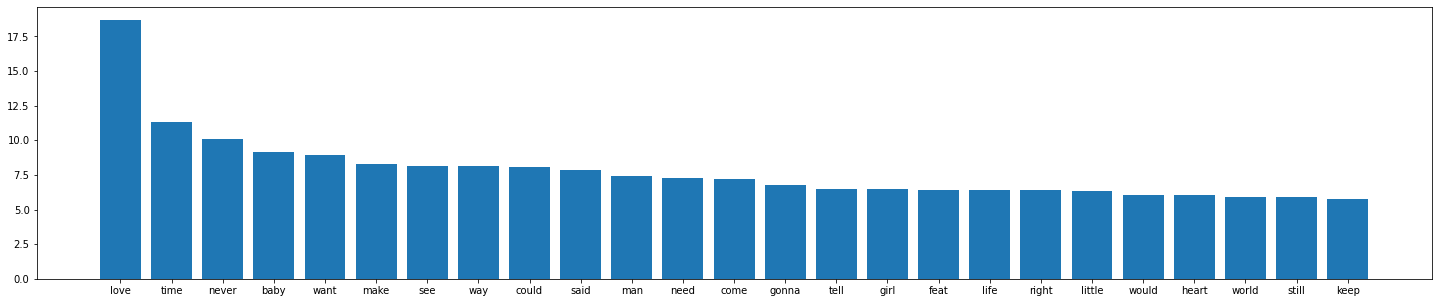

In [11]:
plt.figure(figsize = (25, 5))

# visualize top 10 words
plt.bar(most_freq_tf[0][:25], most_freq_tf[1][:25]);

# Genius Lyrics - Sentiment Analysis

Sentiment analysis is usually used on reviews to determine whether the sentiment of the review is positive or negative toward the product on a range of -1 (negative) to 1 (positive) with 0 representing true neutral. Realizing that Sentiment Analysis technically only needs to exist between a binary--it doesn't necessarily need to be a positive or negative binary--I decided to Feature Engineer my own binaries for lyrical sentiment analysis. By examining the correlation between these lyrical attributes and popularity of song, I will be able to explore how influential lyrical content is on a song's popularity by stream-count.

## Sentiment Analysis - Love vs. Heartbreak

This binary for sentiment analysis is the axis between "Love" and "Heartbreak." These lists of connotative words are very small (especially when most lists for sentiment analysis have HUNDREDS of words at minimum). Obviously, a way to extend this project's research scope in the future would be to extend these lists heavily.

In [12]:
# Let's come up with a list of positive and negative words we might observe.
love_words = ['love', 'loved', 'sexy', 'sex', 'baby', 'shawty', 'girl', 'boy', 'guy', 'date', 'kiss', 'good', 'great', 'together', 'bed', 'wish', 'home', 'temptation','night']
heartbreak_words = ['cry', 'tears', 'distant', 'crazy', 'shit', 'horrible', 'die', 'cold', 'pain', 'lonely', 'lost', 'fight', 'last', 'scream', 'regret','feels']

In [13]:
def simple_sentiment(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # Splits everything up into words with line breaks and punctuation
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    # Stem our positive/negative words.
    love_stems = [p_stemmer.stem(i) for i in set(love_words)]
    heartbreak_stems = [p_stemmer.stem(i) for i in set(heartbreak_words)]

    # Count "love" words.
    love_count = len([i for i in stemmed_words if i in love_stems])
    
    # Count "heartbreak" words
    heartbreak_count = len([i for i in stemmed_words if i in heartbreak_stems])
    
    # Calculate Sentiment Percentage 
    # (Love Count - Heartbreak Count) / (Total Count)

    return round((love_count - heartbreak_count))/ len(stemmed_words)

In [14]:
# Apply sentiment analysis to every single lyrics set
lyric_sentiments_love = []

# For every set of lyrics in our Dataframe...
for lyrics in ordered_songlist['lyrics']:
    
    try: # Convert lyrics to sentiment, then append to list.
        lyric_sentiments_love.append(simple_sentiment(lyrics))
    
    except:
        lyric_sentiments_love.append(0)

In [15]:
ordered_songlist['lyrics_sentiments_love'] = lyric_sentiments_love

In [16]:
ordered_songlist[['popularity','lyrics_sentiments_love']].head()

popularity  lyrics_sentiments_love
0        96.0               -0.003390
1        94.0               -0.012195
2        91.0                0.128205
3        90.0                0.011976
4        88.0                0.245763

## Sentiment Analysis - Hype vs. Chill

This binary for sentiment analysis is the axis between "Hype" and "Chill." These lists of connotative words are very small (especially when most lists for sentiment analysis have HUNDREDS of words at minimum). Obviously, a way to extend this project's research scope in the future would be to extend these lists heavily.

In [17]:
# Let's come up with a list of positive and negative words we might observe.
hype_words = ['hype','yeah','baby','party','damn','punch','fuck','tonight','livin','living','together','wine','drink','alcohol','buzz','everyone','everybody','lit']
chill_words = ['chill','bed','coffee','make','friend','sleep','rest','alone','space','food','breakfast','lunch','dinner','hang','hangout','hungout']

In [18]:
def simple_sentiment(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # Splits everything up into words with line breaks and punctuation
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    # Stem our positive/negative words.
    hype_stems = [p_stemmer.stem(i) for i in set(hype_words)]
    chill_stems = [p_stemmer.stem(i) for i in set(chill_words)]

    # Count "love" words.
    hype_count = len([i for i in stemmed_words if i in hype_stems])
    
    # Count "heartbreak" words
    chill_count = len([i for i in stemmed_words if i in chill_stems])
    
    # Calculate Sentiment Percentage 
    # (Love Count - Heartbreak Count) / (Total Count)

    return round((hype_count - chill_count))/ len(stemmed_words)

In [19]:
simple_sentiment(ordered_songlist['lyrics'][0])

0.01694915254237288

In [20]:
# Apply sentiment analysis to every single lyrics set
lyric_sentiments_energy = []

# For every set of lyrics in our Dataframe...
for lyrics in ordered_songlist['lyrics']:
    
    try: # Convert lyrics to sentiment, then append to list.
        lyric_sentiments_energy.append(simple_sentiment(lyrics))
    
    except:
        lyric_sentiments_energy.append(0)

In [21]:
ordered_songlist['lyric_sentiments_energy'] = lyric_sentiments_energy

In [22]:
ordered_songlist[['popularity','lyric_sentiments_energy']].head()

popularity  lyric_sentiments_energy
0        96.0                 0.016949
1        94.0                -0.004065
2        91.0                 0.006410
3        90.0                 0.029940
4        88.0                -0.016949

## Sentiment Analysis - Independent vs. Cuffed

This binary for sentiment analysis is the axis between romantically "Independent" and "Cuffed." These lists of connotative words are very small (especially when most lists for sentiment analysis have HUNDREDS of words at minimum). Obviously, a way to extend this project's research scope in the future would be to extend these lists heavily.

In [23]:
# Let's come up with a list of positive and negative words we might observe.
independent_words = ['never','independent','bad','cheats','cheated','rude','own','make','win','winning','won','money','power','powerful','killin','cheating','feminist','haters','flawless']
cuffed_words = ['need','cuffed','us','together','forever','love','bed','sleep','goodnight','sweetie','baby','sweetheart','honey','tonight','here','holding','holdin','date','boyfriend','girlfriend']

In [24]:
def simple_sentiment(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # Splits everything up into words with line breaks and punctuation
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    # Stem our positive/negative words.
    independent_stems = [p_stemmer.stem(i) for i in set(independent_words)]
    cuffed_stems = [p_stemmer.stem(i) for i in set(cuffed_words)]

    # Count "love" words.
    independent_count = len([i for i in stemmed_words if i in independent_stems])
    
    # Count "heartbreak" words
    cuffed_count = len([i for i in stemmed_words if i in cuffed_stems])
    
    # Calculate Sentiment Percentage 
    # (Love Count - Heartbreak Count) / (Total Count)

    return round((independent_count - cuffed_count))/ len(stemmed_words)

In [25]:
simple_sentiment(ordered_songlist['lyrics'][0])

-0.013559322033898305

In [26]:
# Apply sentiment analysis to every single lyrics set
lyric_sentiments_independence = []

# For every set of lyrics in our Dataframe...
for lyrics in ordered_songlist['lyrics']:
    
    try: # Convert lyrics to sentiment, then append to list.
        lyric_sentiments_independence.append(simple_sentiment(lyrics))
    
    except:
        lyric_sentiments_independence.append(0)

In [27]:
ordered_songlist['lyric_sentiments_independence'] = lyric_sentiments_independence

In [28]:
ordered_songlist[['popularity','lyric_sentiments_independence']].head()

popularity  lyric_sentiments_independence
0        96.0                      -0.013559
1        94.0                      -0.126016
2        91.0                      -0.089744
3        90.0                      -0.059880
4        88.0                      -0.203390

# Lyric Sentiment EDA

Here, I create a vertical heatmap between song_features and popularity to explore whether these axes of lyrical contents are good indicators of a song's popularity or not.

In [29]:
song_features = ['danceability','energy','loudness','speechiness',
                 'instrumentalness', 'liveness', 'valence', 'tempo',
                'mode','duration_ms','time_signature','acousticness',
                'lyric_sentiments_love', 'lyric_sentiments_energy','lyric_sentiments_independence']

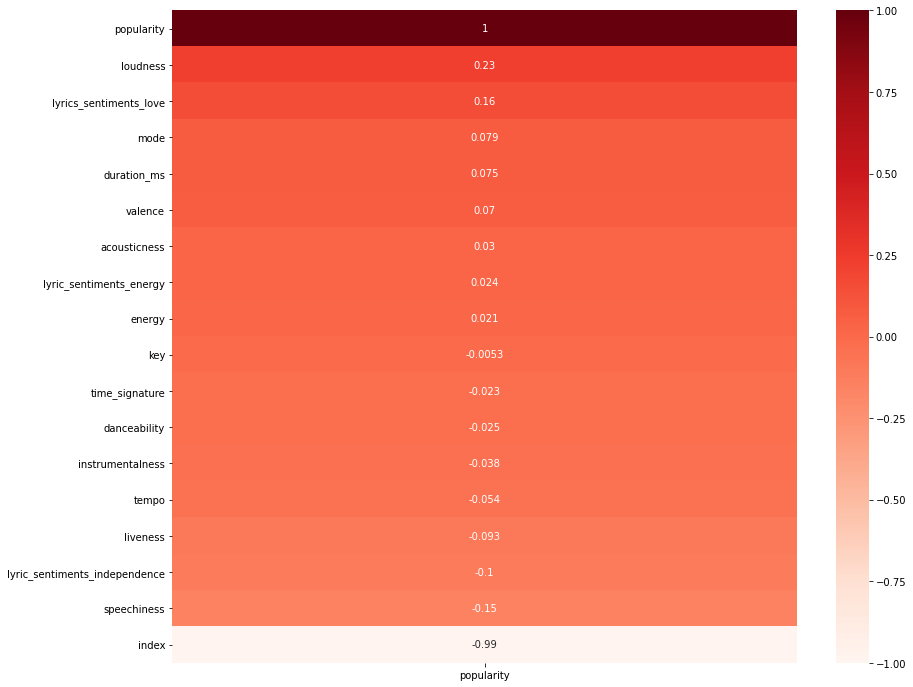

In [30]:
# Heatmap of all features correlation with "popularity"
corr_pop = ordered_songlist.corr()[['popularity']]
plt.figure(figsize=(14,12))
sns.heatmap(corr_pop.sort_values('popularity',ascending=False), cmap="Reds", center=0, annot=True, vmin=-1, vmax=1);

### Go to Part 4. Regression Modeling for more!